# **Logistic Regression (Binary Classification - Multiple Input)**

Logistic regression can be extended to handle binary classification problems involving multiple input features. In this example, we predict whether a candidate is placed (`placed = 1`) or not (`placed = 0`) based on multiple attributes in the dataset.

---

## **Step-by-Step Explanation**

### **1. Data Preparation**
- **Features (`x`)**: Extracted all columns except the target column (`placed`) from the `placement_data` dataset.
- **Target (`y`)**: The `placed` column indicates whether a candidate is placed (1) or not placed (0).

### **2. Data Splitting**
We use `train_test_split` to divide the dataset:
- `x_train`, `y_train`: Training data used to train the logistic regression model.
- `x_test`, `y_test`: Testing data used to evaluate the model's performance.

### **3. Model Training**
- An instance of `LogisticRegression` is created.
- The model is trained on the training data using `lr.fit(x_train, y_train)`.
- During training, the model learns weights ($m_1, m_2, \dots, m_n$) and bias ($b$) by minimizing the cost function (log-loss).

### **4. Model Evaluation**
- The model's accuracy is computed on the test set using `lr.score(x_test, y_test)`. This metric shows how well the model predicts the placement status on unseen data.

### **5. Logistic Regression Equation**
The logistic regression model calculates the probability of placement as:
$$ z = m_1x_1 + m_2x_2 + \dots + m_nx_n + b $$
The sigmoid function maps $z$ to a probability between 0 and 1:
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
- **Classification Rule**:
  - If $\sigma(z) \geq 0.5$, predict `placed = 1`.
  - If $\sigma(z) < 0.5$, predict `placed = 0`.

### **6. Coefficients and Intercept**
- **Coefficients (`m`)**: The model assigns a weight to each input feature, representing its contribution to the prediction.
- **Intercept (`c`)**: The bias term adjusts the decision boundary.

### **7. Decision Boundary Visualization**
Using `plot_decision_regions`, we visualize the decision boundary:
- Each region represents a class (`placed` or `not placed`).
- The boundary separates the input space into two regions, highlighting the classification thresholds.

---

## **Conclusion**
Logistic regression with multiple inputs effectively handles binary classification problems involving multiple features. The decision boundary, visualized in the feature space, provides a clear understanding of how the model distinguishes between classes based on the input attributes.

By analyzing the model's coefficients and intercept, we can interpret the relative importance of each feature in determining the placement outcome.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
placement_data = pd.read_csv('placement.csv')
placement_data.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


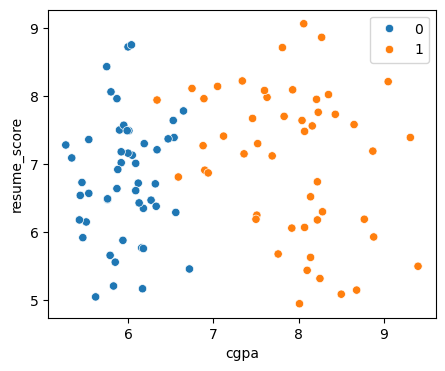

In [17]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='cgpa', y='resume_score', hue='placed', data=placement_data)
plt.legend(loc=1)

plt.show()

In [18]:
x = placement_data.iloc[:,:-1]
y = placement_data['placed']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test, y_test)

1.0

In [28]:
# z = (m1x1 + m2x2 + b)
# y = 1/(1+e^-z)
m = lr.coef_
c = lr.intercept_

m, c

(array([[3.03417823, 0.49690768]]), array([-24.13435286]))

In [26]:
from mlxtend.plotting import plot_decision_regions

c:\Users\Durjay\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


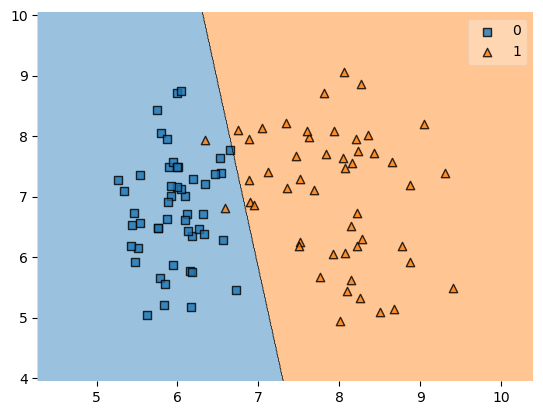

In [27]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lr)
plt.show()